In [2]:
%pylab notebook
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


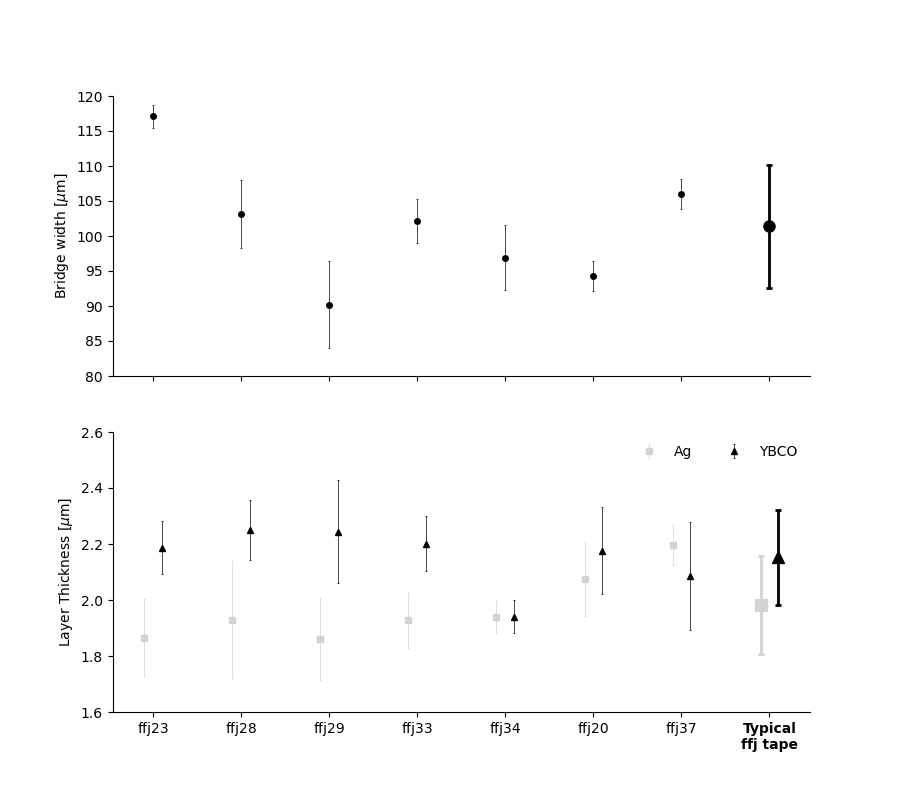

/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_94062/2997391358.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['', 'ffj23', 'ffj28', 'ffj29', 'ffj33', 'ffj34', 'ffj20', 'ffj37', 'Typical\nffj tape'])


In [141]:
fig, ax = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

data = pd.read_excel('Bridge widths.xlsx', sheet_name='Means and Std Dev', usecols=[0, 2, 3], names=['tapeid', 'avg', 'stdev'], nrows=7, skiprows=0)

ax[0].errorbar(data.index, data.avg, data.stdev, marker='o', linestyle='None', color='k', markersize=4, elinewidth=.5, capthick=.5, capsize=.5)
ax[0].errorbar(x=7, y=data.avg.mean(), yerr=data.avg.std(), marker='o', markersize=8, linestyle='None', mec='k', mfc='k', ecolor='k', elinewidth=2, capthick=2, capsize=2)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylim(80, 120)
ax[0].set_ylabel('Bridge width [$\mu$m]')

data_Ag = pd.read_excel('Layer thicknesses.xlsx', sheet_name='Ag', usecols=[17, 18, 19], names=['tapeid', 'avg', 'stdev'], nrows=8, skiprows=0)
data_Re = pd.read_excel('Layer thicknesses.xlsx', sheet_name='REBCO', usecols=[17, 18, 19], names=['tapeid', 'avg', 'stdev'], nrows=8, skiprows=0)

ax[1].errorbar(x=data_Ag.index[:-1]-.1, y=data_Ag.avg[:-1], yerr=data_Ag.stdev[:-1], marker='s', markersize=4, linestyle='None', mec='lightgray', mfc='lightgray', ecolor='lightgray', elinewidth=.5, capthick=.5, capsize=.5, label='Ag')
ax[1].errorbar(x=data_Re.index[:-1]+.1, y=data_Re.avg[:-1], yerr=data_Re.stdev[:-1], marker='^', markersize=4, linestyle='None', mec='k', mfc='k', ecolor='k', elinewidth=.5, capthick=.5, capsize=.5, label='YBCO')
ax[1].errorbar(x=6.9, y=data_Ag.avg.iloc[-1], yerr=data_Ag.stdev.iloc[-1], marker='s', markersize=8, linestyle='None', mec='lightgray', mfc='lightgray', ecolor='lightgray', elinewidth=2, capthick=2, capsize=2)
ax[1].errorbar(x=7.1, y=data_Re.avg.iloc[-1], yerr=data_Re.stdev.iloc[-1], marker='^', markersize=8, linestyle='None', mec='k', mfc='k', ecolor='k', elinewidth=2, capthick=2, capsize=2)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xticklabels(['', 'ffj23', 'ffj28', 'ffj29', 'ffj33', 'ffj34', 'ffj20', 'ffj37', 'Typical\nffj tape'])
ax[1].legend(loc='upper right', frameon=False, ncols=2)
ax[1].set_ylim(1.6, 2.6)

ax[1].set_ylabel('Layer Thickness [$\mu$m]')

for label in ax[1].get_xticklabels():
    if label.get_text() == 'Typical\nffj tape':
        label.set_fontweight('bold')
        
plt.savefig('ffj_width_thicknesses.png', dpi=300)